<h1 align="center" style="color:green">Challange 1</h1>

<h2 style="color:red">What is your recommendation to the company in terms of setting an optimum price for their product?</h2>

<h3 style="color:blue">Logically, higher price will lead to less conversion. We need to verify that and make sure the
change in conversion rate is not accedental. 
I will use Bayesian probabilities to verify the result of the experiment.
<p>
<p>
Null Hypthothesis: Higer price will not affect conversion rate.
<p>
Variation1: Low price
Variation2: High price</p></h3>

In [6]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import pymc3 as pm


In [2]:
#Reading the data
user_table = pd.read_csv('./data/challenge_1/user_table.csv')
test_results = pd.read_csv('./data/challenge_1/test_results.csv')
data_df = pd.merge(user_table, test_results, on='user_id',how='inner')
data_df.user_id = data_df.user_id.apply(str)

data_df.describe()

,lat,long,test,price,converted
count,275616.000000,275616.000000,275616.000000,275616.000000,275616.000000
mean,37.111680,-93.981772,0.359878,46.201324,0.018210
std,5.209627,18.086486,0.479965,9.600403,0.133711
min,19.700000,-157.800000,0.000000,39.000000,0.000000
25%,33.660000,-112.200000,0.000000,39.000000,0.000000
50%,37.740000,-88.930000,0.000000,39.000000,0.000000
75%,40.700000,-78.910000,1.000000,59.000000,0.000000
max,61.180000,30.310000,1.000000,59.000000,1.000000


In [15]:
#We can uncoment the below statement to repeat the experiment for different number of days and check the result
#data = data_df[data_df.timestamp < '2015-03-12']
data = data_df
v1_count = len(data[data.test==0])
v2_count = len(data[data.test==1])
v1_converted_count = len(data[data.test==0][data.converted==1])
v2_converted_count = len(data[data.test==1][data.converted==1])
v1_conversion_rate = data[data.test==0].converted.mean()
v2_conversion_rate = data[data.test==1].converted.mean()
print('variation1')
print('no of users={}, no of converted users={}, conversion rate={}'.format(v1_count, v1_converted_count, v1_conversion_rate))
print('\n')
print('variation2')
print('no of users={}, no of converted users={}, conversion rate={}'.format(v2_count, v2_converted_count, v2_conversion_rate))


variation1
no of users=176428, no of converted users=3489, conversion rate=0.019775772553109482


variation2
no of users=99188, no of converted users=1530, conversion rate=0.015425253054805016


<h3 style="color:blue"> The above result shows that conversion rate droped by almost 
21% when the price was increased. We need to prove this occured not by chance</h3>

In [16]:
#PyMC3 a package for Bayesian statistical modeling and probabilistic machine learning
with pm.Model() as model:
    # Priors for unknown model parameters
    v1_conv_rate = pm.Beta('v1_conv_rate', alpha=2, beta=2)
    v2_conv_rate = pm.Beta('v2_conv_rate', alpha=2, beta=2)

    # We have got the data, lets update our priors
    like_v1 = pm.Binomial('like_v1', n=v1_count, p=v1_conv_rate, observed=v1_converted_count)
    like_v2 = pm.Binomial('like_v2', n=v2_count, p=v2_conv_rate, observed=v2_converted_count)
    
    #What is the difference between the two postoriors?
    pm.Deterministic('difference', v2_conv_rate - v1_conv_rate)
    
    # inference
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP())

logp = -14.112, ||grad|| = 0.094395: 100%|██████████| 14/14 [00:00<00:00, 2390.70it/s]  
100%|██████████| 50500/50500 [00:11<00:00, 4254.67it/s]


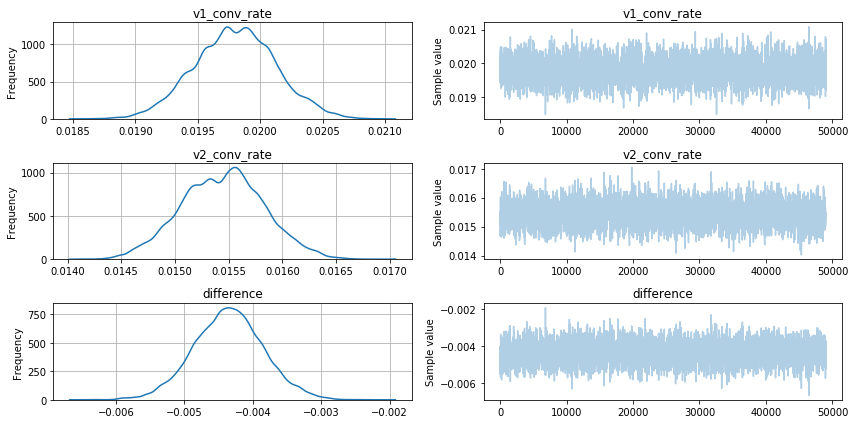

In [17]:
_ = pm.traceplot(trace[1000:], grid=True)

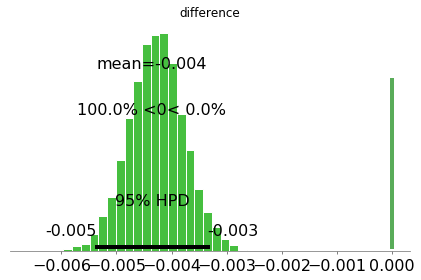

In [18]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference'], ref_val=0, color='#46BF3F')

<h3 style="color:blue">From the above figure there is no overlap between the two posteriors. Therefore, the result We obtained are statistically significance (100% confidence) that higher price causes lower conversion rate. We can reject the Null hypothesis.
A simple calculation can show the drop in the revenue:
<p>
<p>
Low price:
3489(no. of converted users) X 39(price) = 136071
<p>
High price:
1530(no. of converted users) X 59(price) = 90270
<p>
33% confirmed drop in revenue with higher. 
</h3>

<h3 style="color:red">Can you optimize the number of days that the test is run? After how many days you would have stopped the test? Why?</h3>

<h3 style="color:blue">
The number of test days is based on the uplift in the conversion rate required to be achieved. This will decide the number of visitors required to achieve statistically significant result and hence the length of the test. One approach is to observe the difference graph above daily, when we get a high confidence level (95%) and this continues for more few days we can stop the test. We can draw a graph where the x-axis is the number of days and y-axis is the confidence level, if the confidence continues to increase we can stop the experiment. 

For the given test, the data were collected between 2 March and ended 31 May. The difference figure looks as below after 10 days.
Therefore We could have stopped the experiments after 10-15 days. (See first line in cell 3 above).
</h3>

 <img src="./images/confidence_10_days.png">

<h3 style="color:red">What are your main findings looking at the data? What is your overall view into user behavior, especially focusing on actionable insights that might increase conversion rate?</h3>

<h3 style="color:blue"> Different analysis can be done to get insigts.
Below are some of the basic analysis was done using Tableau.
<p>
<p>
The figure below shows from where the users are coming.
</h3>

<img src="./images/locations.png">

<h3 style="color:blue">
The figure below shows what source most of the users use to get to the company. Large portion of the users came by direct_traffic, however the conversion rate is lower. Further investigation could be done to know the reason.
<p>
<p>
friend_referral has the highest conversion rate, a money incentive could be introduced to encourage users to refer their friends to the product.
</h3>

 <img src="./images/conversionratevssource.png">

<h3 style="color:blue"> The figure below shows that more users use mobile than web devices. In general ads are more common than search engines.
</h3>

<img src="./images/ratevsdeviceh.png">